# Poisson Equation in 2D

In [1]:
import gc
import jax
import anon
import anabel
import anabel.backend as anp
from interpolate import lagrange_t6
anon.conf.config.update('jax_disable_jit', True)
from poisson import poisson

Source term, $f$:

In [2]:
f=lambda x: 4.0

The analytic solution, $u$:

In [3]:
u = lambda x: 1-x[0]**2 - x[1]**2

In [4]:
# model = anabel.MeshGroup.read("circle_iso/mesh1","m228","triangle6")
# model.plot(func=u)

In [5]:
import anon.diff as diff
from anabel.template import template

# @template(6)
# def poisson(transf, test, trial, f=lambda x: 0.0, ndim=2, quad_point=None, thickness=1.0, **kwds):
#     """
#     Parameters
#     ----------
#     test, trial : Callable
#         test and trial interpolants over the reference element.
#     thickness : float
#     """
#     state = {}
    
#     det = anp.linalg.det
#     slv = anp.linalg.solve
    
#     jacn_test = diff.jacx(test)
#     jacn_trial = diff.jacx(trial)
    
#     def transf(xi, xyz):
#         return test(xi)@xyz
#     def jacn_transf(xi,xyz):
#         return jacn_test(xi)@xyz
    
#     jacx_test = lambda xi,xyz: slv(jacn_transf(xi,xyz), jacn_test(xi))
#     dvol = lambda xi, xyz: 0.5*thickness*abs(det(jacn_transf(xi,xyz)))
    
#     def jacx(_,__,___,xyz,xi=quad_point,**kwds):
#         return (jacx_test(xi,xyz).T@jacx_test(xi,xyz))*dvol(xi,xyz)
    
#     def main(u,__,___,xyz=None,xi=quad_point,**kwds):
#         p = (test(xi)[:,None]*f(transf(xi,xyz)))*dvol(xi,xyz)

# #         p = jacx_test(xi,xyz).T@jacx_test(xi,xyz)*dvol(xi,xyz)@u+ test(xi)[:,None]*f(transf(xi,xyz))*dvol(xi,xyz)
# #         return None,p,None
#         return p
#     return locals()

In [6]:
model =  anabel.MeshGroup.read("circle_iso/mesh1", "m228", cell="triangle6")
xi = model.param("xi")
elem = poisson(*[lagrange_t6()]*3,f=f,quad_point=xi)

In [7]:
import meshio
meshio.write("circle_iso/mesh1.xdmf",model.mesh)

In [8]:
U = model.compose(elem=elem)
quad = anon.quad.simplex.Simplex.load("gauss02.m")

In [9]:
with jax.disable_jit():
    U_h = U(quad.points, quad.weights)

[[ 1.73205081e+00  9.62250449e-02  9.62250449e-02 ... -1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [ 9.62250449e-02  1.76465233e+00  1.24238448e-01 ...  0.00000000e+00
   6.93889390e-17 -2.26648286e-01]
 [ 9.62250449e-02  1.24238448e-01  1.76465233e+00 ... -4.96953791e-01
  -2.26648286e-01 -8.32667268e-17]
 ...
 [-1.38777878e-17  0.00000000e+00 -4.96953791e-01 ...  2.35161059e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  6.93889390e-17 -2.26648286e-01 ...  0.00000000e+00
   2.33738511e+00 -6.09007402e-01]
 [ 0.00000000e+00 -2.26648286e-01 -8.32667268e-17 ...  0.00000000e+00
  -6.09007402e-01  2.33738511e+00]]
(6, 1)
Traced<ShapedArray(float64[24,6,1])>with<BatchTrace(level=1/0)>
  with val = DeviceArray([[[[-0.06404797],
                            [ 0.12809594],
                            [-0.06404797],
                            [ 0.25619188],
                            [ 0.25619188],
                            [ 0.06404797]],
             
                    

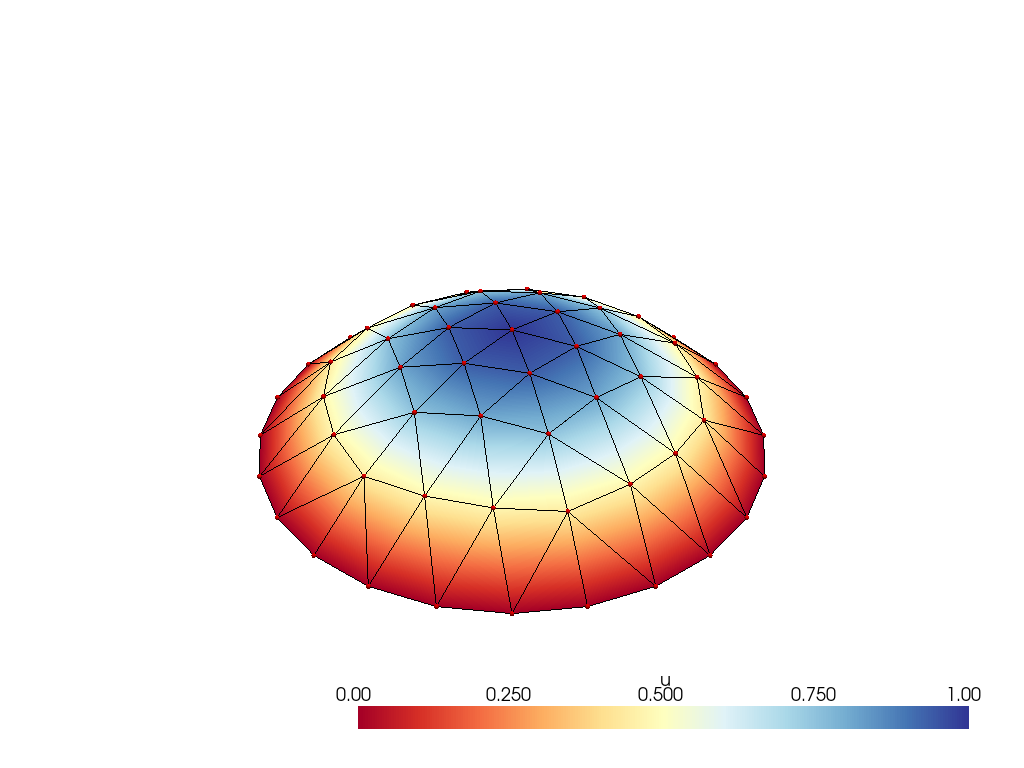

In [10]:
model.plot(U_h,render_points_as_spheres=True)

In [11]:
for m in [1]:#4,5]:
    print(f"m: {m}")
    from jax.interpreters import xla
    xla._xla_callable.cache_clear()

    model =  anabel.MeshGroup.read(f"circle_iso/mesh{m}", "m228", cell="triangle6")
    xi = model.param("xi")
    elem = poisson(*[lagrange_t6()]*3, f=f, quad_point=xi)

    U = jax.jit(model.compose(elem=elem, verbose=True))
    print(f"Model built with {model.nf} dofs and {model.ne} elements")
    for g in [2]:#2,5,8,13,19]:
        print(f"\tg: {g}")
        quad = anon.quad.simplex.Simplex.load(f"gauss{g:02}.m")
        print("loaded quadrature")
        U_h = U(quad.points, quad.weights)
        print("execution complete")
#         anp.savez(f"mesh{m}-gauss{g:02}.npz",U_h)
#         model.plot(U_h,render_points_as_spheres=True, savefig=f"../img/mesh{m}-gauss{g:02}.png")
    del U
    del U_h
    del model
    gc.collect()

m: 1
Constructing jacobian map.
Jacobian map complete.
Model built with 37 dofs and 61 elements
	g: 2
loaded quadrature
[[ 1.73205081e+00  9.62250449e-02  9.62250449e-02 ... -1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [ 9.62250449e-02  1.76465233e+00  1.24238448e-01 ...  0.00000000e+00
   6.93889390e-17 -2.26648286e-01]
 [ 9.62250449e-02  1.24238448e-01  1.76465233e+00 ... -4.96953791e-01
  -2.26648286e-01 -8.32667268e-17]
 ...
 [-1.38777878e-17  0.00000000e+00 -4.96953791e-01 ...  2.35161059e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  6.93889390e-17 -2.26648286e-01 ...  0.00000000e+00
   2.33738511e+00 -6.09007402e-01]
 [ 0.00000000e+00 -2.26648286e-01 -8.32667268e-17 ...  0.00000000e+00
  -6.09007402e-01  2.33738511e+00]]
(6, 1)
Traced<ShapedArray(float64[24,6,1])>with<BatchTrace(level=1/0)>
  with val = DeviceArray([[[[-0.06404797],
                            [ 0.12809594],
                            [-0.06404797],
                            [ 0.25619188],
 

In [12]:
model.plot(func=u)

NameError: name 'model' is not defined

## Error Analysis

In [ ]:
@template(1)
def H1(transf,test,trial,u,quad_point=None, thickness=1.0):
    state = None
    det = anp.linalg.det
    slv = anp.linalg.solve
    du = diff.jacfwd(u)
    jacn_test = diff.jacx(test)
    jacn_trial = diff.jacx(trial)
    
    def transf(xi, xyz):
        return test(xi)@xyz
    def jacn_transf(xi,xyz): return jacn_test(xi)@xyz
    
    jacx_test = lambda xi,xyz: slv(jacn_transf(xi,xyz), jacn_test(xi))
    dvol = lambda xi, xyz: 0.5*thickness*abs(det(jacn_transf(xi,xyz)))
    
    def main(U,__,___,xyz=None,xi=quad_point):
        q = (du(transf(xi,xyz)) - jacx_test(xi,xyz)@U)**2 * dvol(xi,xyz)
        return _,q,___
    return locals()

In [ ]:
model.assemble_integral(elem=H1(*[lagrange_t6()]*3,u=u))(U_h,points=quad.points,weights=quad.weights)

In [ ]:
quad.points

In [ ]:
import anabel.backend as anp 
a = anp.ones((2,3,2))
b = an

In [ ]:
idx = [(i,j,k) for i in range(2) for j in range(3) for k in range(4)]

In [ ]:
idx

In [ ]:
a[tuple(zip(*idx))]

In [ ]:
tuple(zip(*idx))